In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

import time
import numpy as np
from scipy.fftpack import fft
from scipy import signal
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler

from glob import glob
from gesture_comparison_helper import acc_print, emg_print, gyro_print, orientation_print
from gesture_comparison_helper import orientation_euler_print, all_print, load_gestures



plt.rcParams['figure.figsize'] = (30.0, 30.0)
font = {
    'weight': 'bold',
    'size': 25
}
plt.rc('font', **font)

def gesture_start_end(gesture_dict):
    acc_timestamp_start = gesture_dict['accelerometer']['timestamps'][0]
    acc_timestamp_end = gesture_dict['accelerometer']['timestamps'][-1]
    emg_timestamp_start = gesture_dict['emg']['timestamps'][0]
    emg_timestamp_end = gesture_dict['emg']['timestamps'][-1]
    gyro_timestamp_start = gesture_dict['gyro']['timestamps'][0]
    gyro_timestamp_end = gesture_dict['gyro']['timestamps'][-1]
    ori_timestamp_start = gesture_dict['orientation']['timestamps'][0]
    ori_timestamp_end = gesture_dict['orientation']['timestamps'][-1]
    
    #if acc_timestamp_start - gyro_timestamp_start != 0 or acc_timestamp_start - ori_timestamp_start != 0 or acc_timestamp_end - gyro_timestamp_end != 0 or acc_timestamp_end - ori_timestamp_end != 0:
    if len(gesture_dict['accelerometer']['timestamps']) == 10 or len(gesture_dict['gyro']['timestamps']) == 10 or len(gesture_dict['orientation']['timestamps']) == 10:
        print('User: {}\nGesture: {}\nTimestamp: {}'.format(gesture_dict['performed_by'], gesture_dict['gesture'], gesture_dict['datetime']))
        print('-'*25)
        print('Starts:')
        print('acc-emg: {}'.format(acc_timestamp_start - emg_timestamp_start))
        #print('acc-gyro: {}'.format(acc_timestamp_start - gyro_timestamp_start))
        #print('acc-ori: {}'.format(acc_timestamp_start - ori_timestamp_start))
        print('-'*25)
        print('Ends:')
        print('acc-emg: {}'.format(acc_timestamp_end - emg_timestamp_end))
        #print('acc-gyro: {}'.format(acc_timestamp_end - gyro_timestamp_end))
        #print('acc-ori: {}'.format(acc_timestamp_end - ori_timestamp_end))
        print()

def calculate_rms(value_list):
    value_list = np.array(value_list)
    return np.sqrt(np.mean(np.square(value_list)))

test_dict = load_gestures(glob('../Data/converted/adrian/big_stop/*'))
test_dict += load_gestures(glob('../Data/converted/megan/big_stop/*'))
#test_dict = load_gestures(glob('../Data/converted/*/*/*'))

#print(calculate_rms(test_dict[0]['emg']['1']))

emg_len = []
imu_len = []

for e in test_dict:
    #gesture_start_end(e)
    emg_len.append(len(e['emg']['timestamps']))
    imu_len.append(len(e['accelerometer']['timestamps']))
    imu_len.append(len(e['gyro']['timestamps']))
    imu_len.append(len(e['orientation']['timestamps']))
    [print('RMS for EMG {}: {}'.format(str(x), calculate_rms(e['emg'][str(x)]))) for x in range(1, 9, 1)]
    print()

print('\nMean EMG length: {}'.format(np.mean(emg_len)))
print('Mean IMU length: {}'.format(np.mean(imu_len)))

#emg_len.remove(20)
#imu_len.remove(5)
#imu_len.remove(5)
#imu_len.remove(5)

#emg_len.remove(40)
#imu_len.remove(10)
#imu_len.remove(10)
#imu_len.remove(10)

#print('Min EMG length: {}'.format(min(emg_len)))
#print('Max EMG length: {}'.format(max(emg_len)))
#print('Min IMU length: {}'.format(min(imu_len)))
#print('Max IMU length: {}'.format(max(imu_len)))
   
#print(sorted(emg_len))
#print(sorted(imu_len))

RMS for EMG 1: 10.405725177317699
RMS for EMG 2: 21.194736786992177
RMS for EMG 3: 46.406294580658205
RMS for EMG 4: 22.277548263363858
RMS for EMG 5: 11.840726803916215
RMS for EMG 6: 7.026627496594907
RMS for EMG 7: 5.669441796255121
RMS for EMG 8: 3.6799685697976816

RMS for EMG 1: 10.854188923672542
RMS for EMG 2: 23.255124995889044
RMS for EMG 3: 43.85584829608694
RMS for EMG 4: 19.363401038824673
RMS for EMG 5: 13.130692835476072
RMS for EMG 6: 7.743259732104174
RMS for EMG 7: 5.6725829271143775
RMS for EMG 8: 4.181420420091688

RMS for EMG 1: 10.112885569680621
RMS for EMG 2: 23.707401989482296
RMS for EMG 3: 48.4688981812986
RMS for EMG 4: 19.160862098654025
RMS for EMG 5: 9.917844340562942
RMS for EMG 6: 6.46810355794986
RMS for EMG 7: 4.574882015368861
RMS for EMG 8: 4.921658995981667

RMS for EMG 1: 11.071687227541975
RMS for EMG 2: 19.25047129712128
RMS for EMG 3: 22.786951557641988
RMS for EMG 4: 15.241338100599114
RMS for EMG 5: 10.643034978256301
RMS for EMG 6: 10.102858

ACC  length: 120
ACC  start: 1500322316166333
ACC  end: 1500322318534541


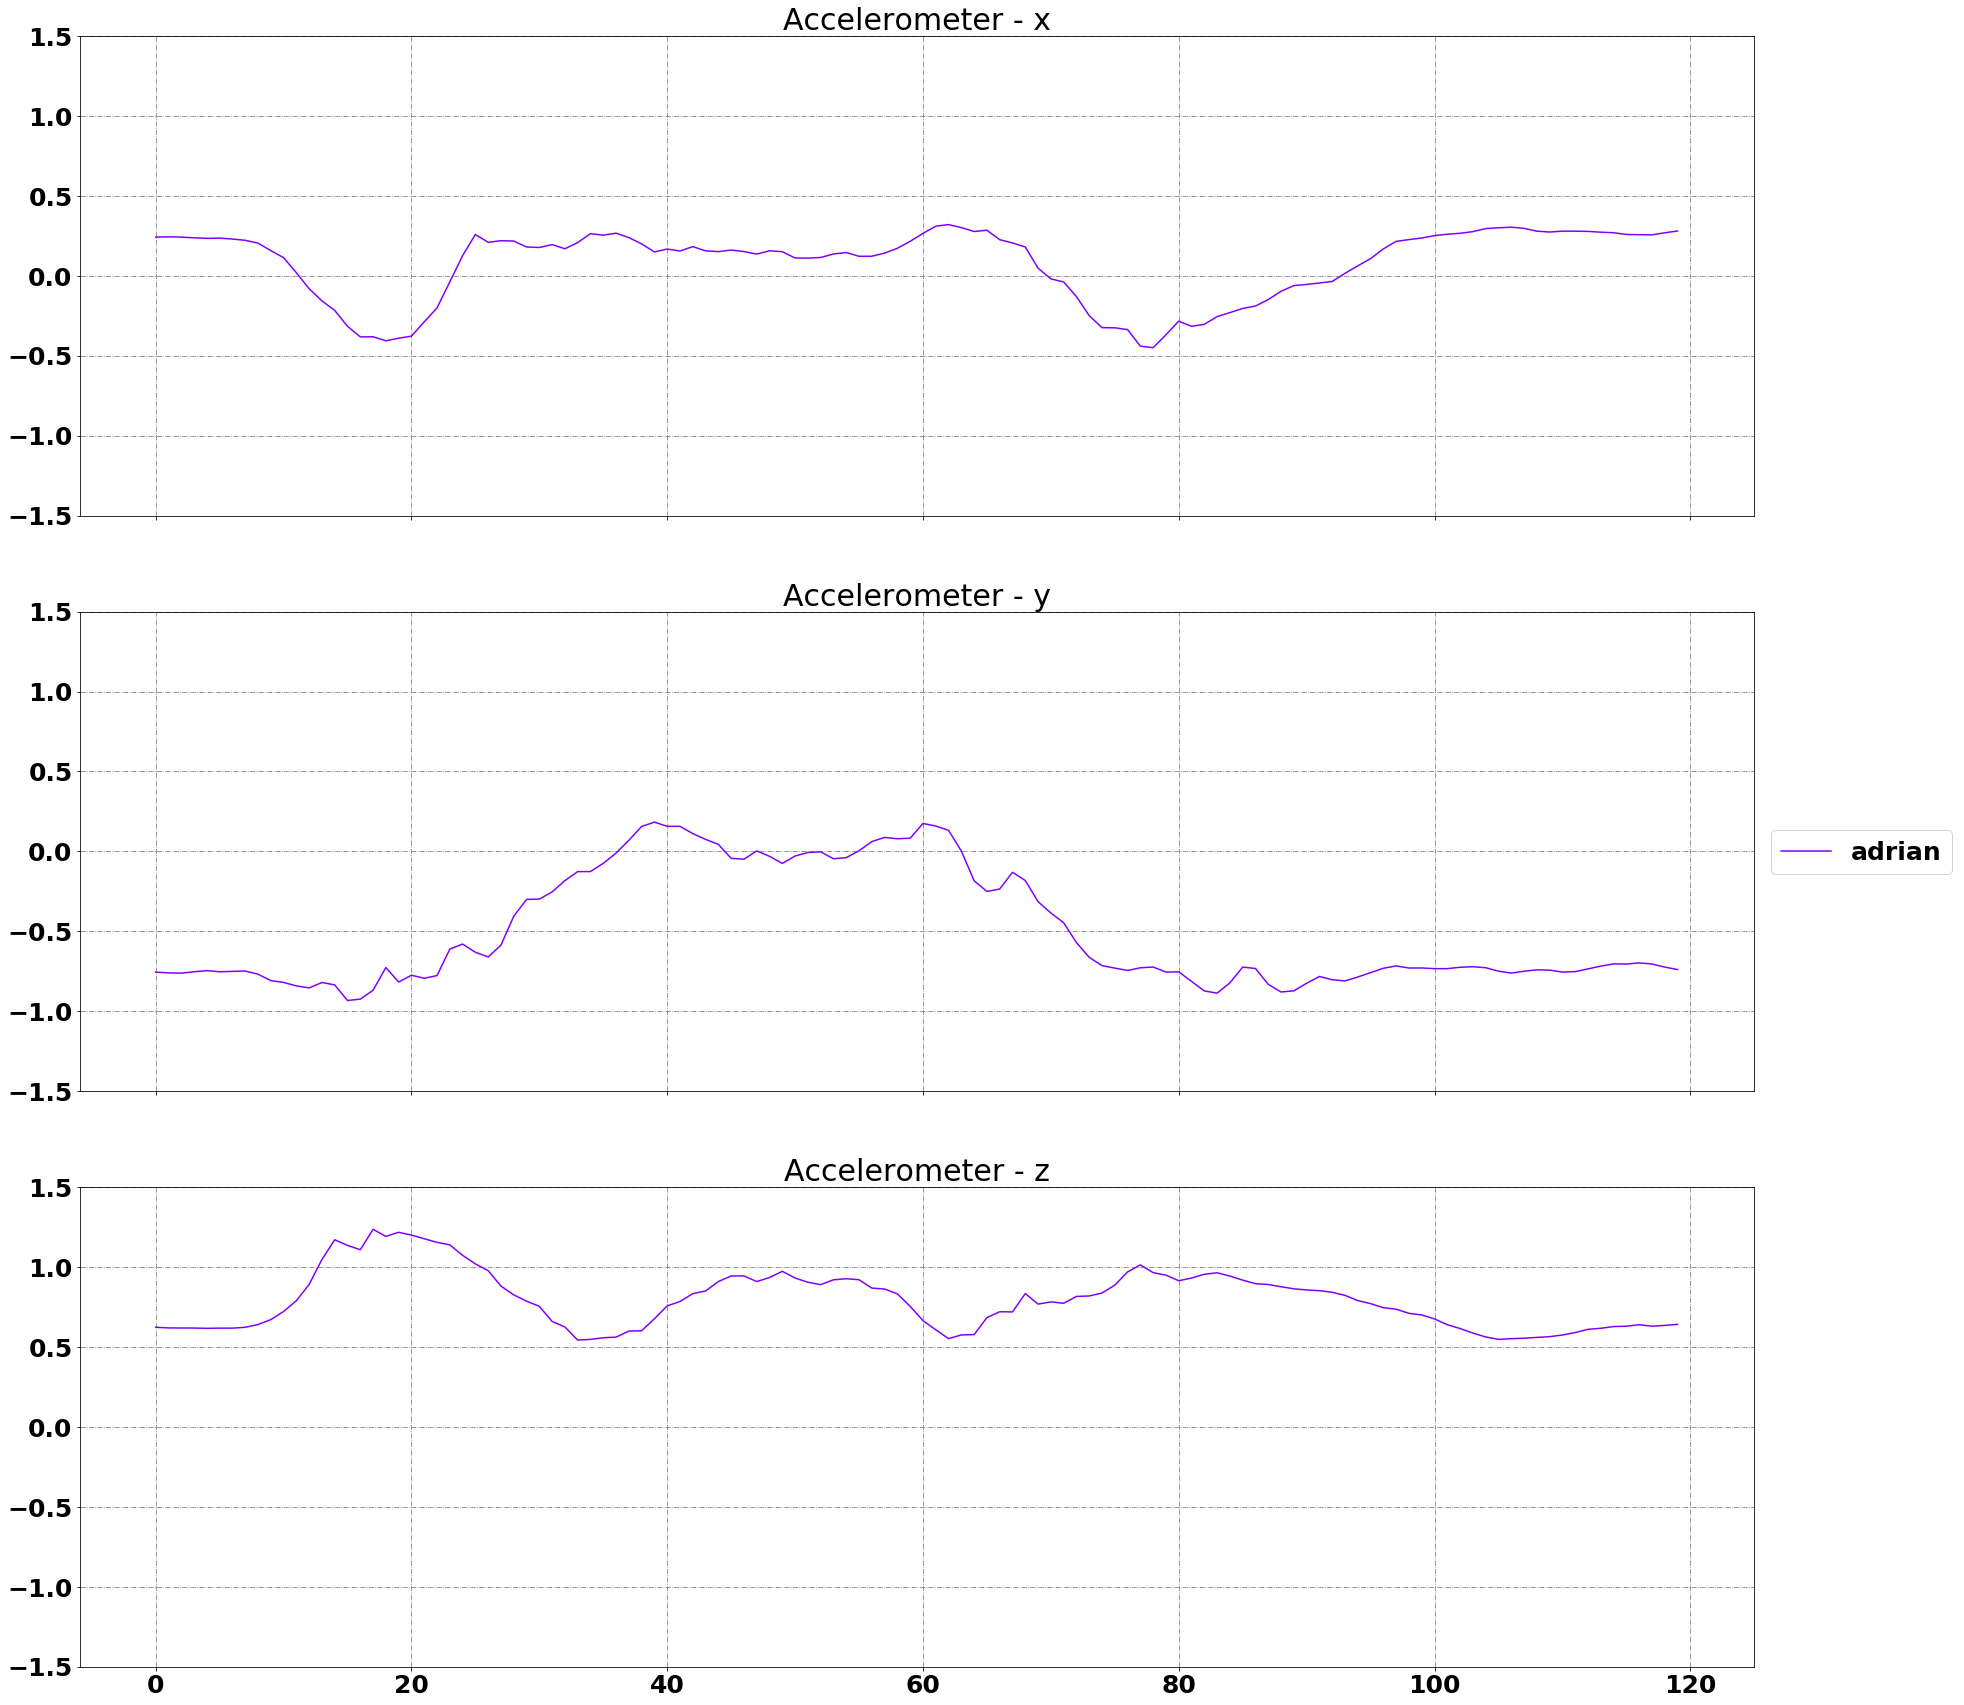

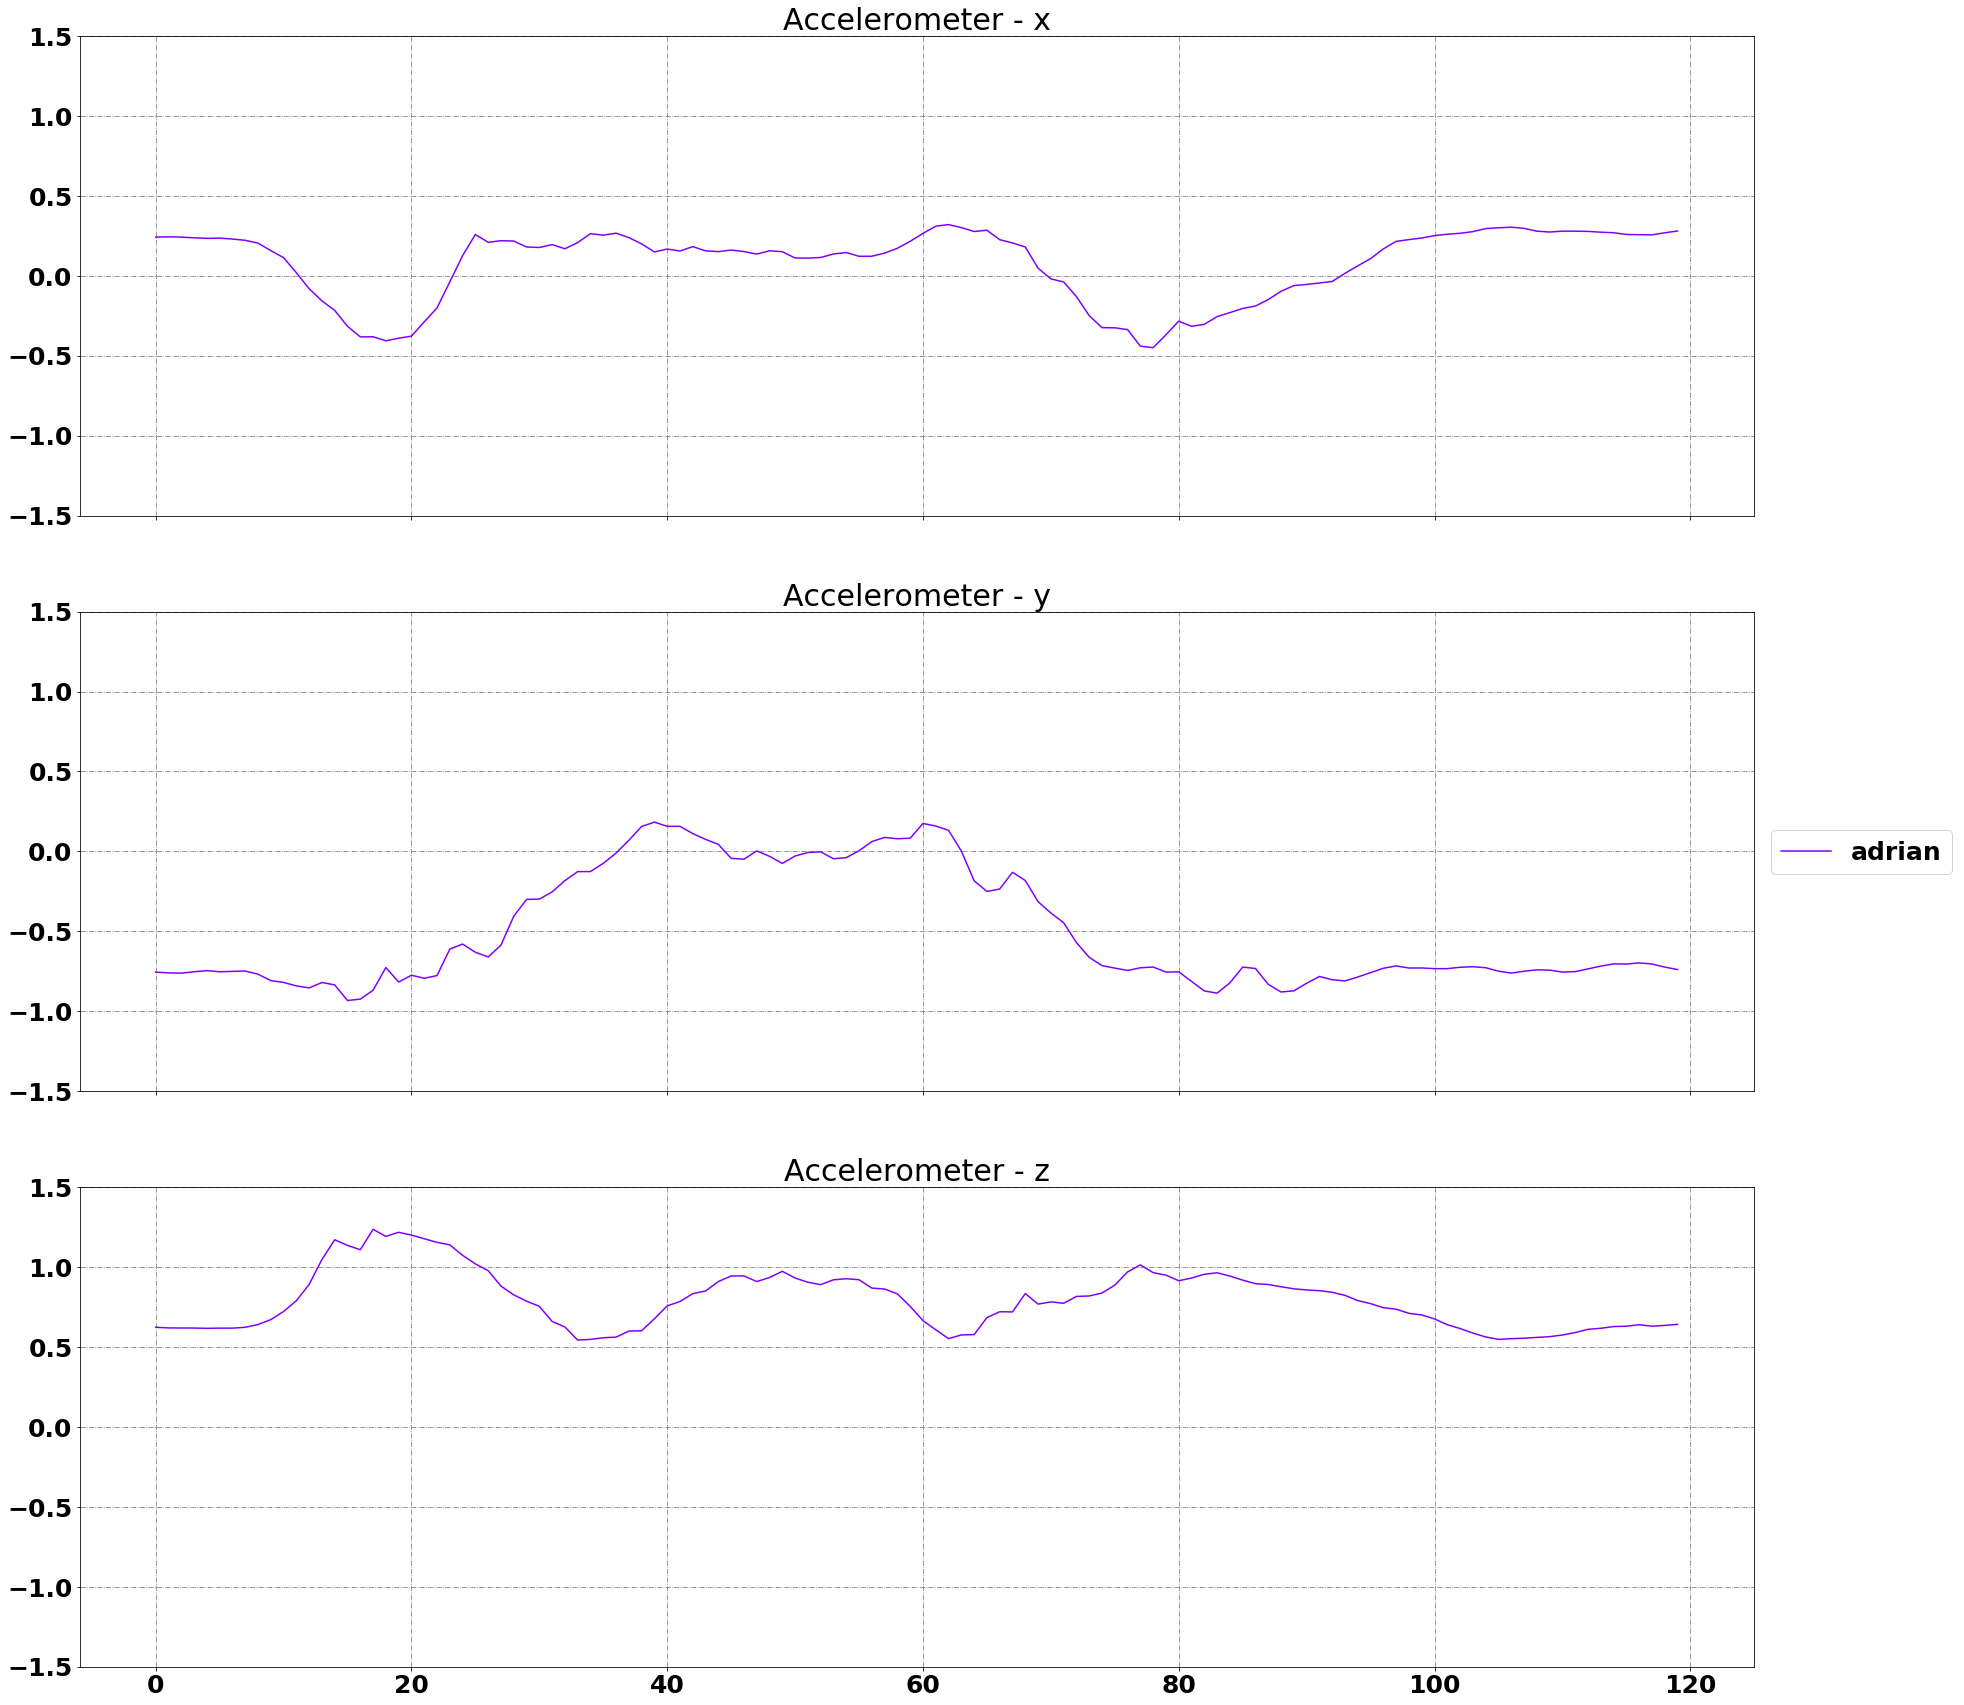

In [2]:
scaler = MinMaxScaler(feature_range=(0, 1))

test_dict = load_gestures(glob('../Data/converted/adrian/big_stop/big_stop2017-07-17_22-11-56.p'))
test_dict = test_dict[0]

acc_print([test_dict])
#print(type(test_dict))
acc_x = test_dict['accelerometer']['x']
acc_y = test_dict['accelerometer']['y']
acc_z = test_dict['accelerometer']['z']
#print(acc_x)

acc_x = np.array(acc_x)
acc_shape = acc_x.shape
acc_y = np.array(acc_y)
acc_z = np.array(acc_z)


scaled_value_x = scaler.fit_transform(np.array(acc_x).reshape(-1, 1)).reshape(acc_shape)
scaled_value_y = scaler.fit_transform(np.array(acc_y).reshape(-1, 1)).reshape(acc_shape)
scaled_value_z = scaler.fit_transform(np.array(acc_z).reshape(-1, 1)).reshape(acc_shape)

#test_dict['accelerometer']['x'] = scaled_value_x
#test_dict['accelerometer']['y'] = scaled_value_y
#test_dict['accelerometer']['z'] = scaled_value_z

acc_print([test_dict])



#print('EMG  length: {}'.format(len(test_dict['emg']['1'])))
print('ACC  length: {}'.format(len(test_dict['accelerometer']['x'])))
#print('GYRO length: {}'.format(len(test_dict['gyro']['x'])))
#print('ORI  length: {}'.format(len(test_dict['orientation']['x'])))
#print()
#print('EMG  start: {}'.format(test_dict['emg']['timestamps'][1]))
print('ACC  start: {}'.format(test_dict['accelerometer']['timestamps'][0]))
#print('GYRO start: {}'.format(test_dict['gyro']['timestamps'][0]))
#print('ORI  start: {}'.format(test_dict['orientation']['timestamps'][0]))
#print()
print('ACC  end: {}'.format(test_dict['accelerometer']['timestamps'][-1]))
#print('GYRO end: {}'.format(test_dict['gyro']['timestamps'][-1]))
#print('ORI  end: {}'.format(test_dict['orientation']['timestamps'][-1]))
#print('EMG  end: {}'.format(test_dict['emg']['timestamps'][-2]))

In [ ]:



acc_train = load_gestures(glob('../Data/converted/adrian/big_stop/*'))
acc_train += load_gestures(glob('../Data/converted/adrian/come_up/*'))
acc_train += load_gestures(glob('../Data/converted/adrian/come_here/*'))


acc_test = load_gestures(glob('../Data/converted/ruben/big_stop/*'))
acc_test += load_gestures(glob('../Data/converted/ruben/come_up/*'))
acc_test += load_gestures(glob('../Data/converted/ruben/come_here/*'))

In [6]:
acc_train = load_gestures(glob('../Data/converted/a*/*/*'))
acc_train += load_gestures(glob('../Data/converted/cynthia/*/*'))
acc_train += load_gestures(glob('../Data/converted/flo/*/*'))
acc_train += load_gestures(glob('../Data/converted/kai/*/*'))
acc_train += load_gestures(glob('../Data/converted/lisa/*/*'))
acc_train += load_gestures(glob('../Data/converted/m*/*/*'))
acc_train += load_gestures(glob('../Data/converted/nina_v/*/*'))
acc_train += load_gestures(glob('../Data/converted/oli/*/*'))
acc_train += load_gestures(glob('../Data/converted/paul/*/*'))

acc_test = load_gestures(glob('../Data/converted/ruben/*/*'))
acc_test += load_gestures(glob('../Data/converted/s*/*/*'))


FRAME_NUMBER = 9

classifier = svm.SVC(kernel='linear',
                     decision_function_shape='ovo')

def prepare_data(acc_train, for_training=False):
    label = []
    train_input = []
    features_per_gesture = []
    
    for gesture in acc_train:
        sensor_data = [gesture['accelerometer']['x'], gesture['accelerometer']['y'], gesture['accelerometer']['z']]
        splitted_frames = split_in_frames(sensor_data, FRAME_NUMBER)

        if splitted_frames is None:
            data_length = len(gesture['accelerometer']['timestamps'])
            print('split_in_frames() returned None: Data length was {} but needs to be bigger than {} + 1'.format(data_length
                                                                                                                 , FRAME_NUMBER))
            continue

        features = create_acc_feature_vector(splitted_frames)

        if features is not None:
            features_per_gesture.append(features)
            label.append(gesture['gesture'])

    for feature_list in features_per_gesture:
        features = np.array(feature_list)
        o_shape = features.shape
        if True in np.isnan(features):
            #print(features_per_gesture.index(feature_list))
            #print(feature_list)
        features = scaler.fit_transform(features.reshape(-1, 1)).reshape(o_shape)

        train_input.append(features)
    if for_training:
        return train_input, label
    else:
        return train_input

train_input, label = prepare_data(acc_train, for_training=True)
test_input = prepare_data(acc_train, for_training=False)

#print(test_input)

#classifier.fit(train_input, label)
#print(label)
#predictions = classifier.predict(test_input)
#print(predictions)
#print(label == predictions)

c:\python36\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in true_divide
c:\python36\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in multiply


split_in_frames() returned None: Data length was 5 but needs to be bigger than 9 + 1


c:\python36\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide
c:\python36\lib\site-packages\ipykernel_launcher.py:50: RuntimeWarning: divide by zero encountered in true_divide
c:\python36\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in log2
c:\python36\lib\site-packages\ipykernel_launcher.py:81: RuntimeWarning: invalid value encountered in true_divide


[(9.001953125+0j), (-1.6240234375+0j), (3.5888671875+0j), 0.056091520521375865, 0.099237336052788658, 0.03577868143717447, -7.8610791559675688, 3.4824567714071692, -0.18934173797426229, 0.071050945433004817, 0.094505874128283568, 0.056745760452616222, 42.587923790910814, -0.95595926851675184, 22.709061437330885, (7.603515625+0j), (-3.34814453125+0j), (4.76708984375+0j), 0.0925237867567274, 0.11632127232021755, 0.070631795459323465, -2.1607974741284992, 2.2032429794815123, 0.2406999334285348, 0.091253168756517539, 0.10231771356329059, 0.07972992908148803, 53.551653929920015, -0.96938487829194797, 40.100790184541069, (5.79150390625+0j), (-4.69091796875+0j), (5.95654296875+0j), 0.15212188826666939, 0.030405812793307823, 0.036368078655666755, 1.5011899730286953, -2.4412795832436993, -5.2532120065493428, 0.11700841826125266, 0.052311787881869465, 0.057211249584413114, 87.872998881299537, -0.92844410485138151, 187.67746203535168, (3.7001953125+0j), (-5.259765625+0j), (6.48486328125+0j), 0.15

c:\python36\lib\site-packages\ipykernel_launcher.py:81: RuntimeWarning: divide by zero encountered in true_divide
c:\python36\lib\site-packages\sklearn\utils\validation.py:382: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)
c:\python36\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype complex128 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
clf = svm.SVC(decision_function_shape='ovo')

X = [[0, 0], [1, 1], [2, 2]]
Y = ['None', 'gesture', 'whatever']

clf.fit(X, Y)
clf.predict([[0.5, 0.5]])

In [ ]:
length = 123
frames = 9
# every two adjunct sequences make a frame thus input has one sequence more than frames
sequence_count = frames + 1
segment_length = length // sequence_count
cut_off = length % sequence_count
frame_length = 2 * segment_length
print('Segment length: {}'.format(segment_length))

data = list(range(length))
#print(data)
data = data[:-cut_off]
print()
print(data)
print()

segmented_data = [data[segment:segment + frame_length] for segment in range(0, len(data), segment_length)]
print(segmented_data)
#print(type(np.array(segmented_data)[0]))
#print(np.array(segmented_data).shape)

In [4]:
def split_in_frames(sensor_data, frame_number):
    '''
    every two adjunct sequences make a frame
    => input data has one segment more than frames
    => frame length is two times segment lenght
    '''
    data_length = len(sensor_data[0])
    segment_count = frame_number + 1
    segment_length = data_length // segment_count
    
    # check if data is long enough for given frame_number
    if segment_length <= 0:
        return None
    
    cut_off = data_length % segment_count
    frame_length = 2 * segment_length

    segmented_data = []
    for sensor_axis in sensor_data:
        if cut_off > 0:
            filtered_sensor_axis = sensor_axis[:-cut_off]
        else:
            filtered_sensor_axis = sensor_axis[:]

        segmented_axis = []
        for segment in range(0, len(filtered_sensor_axis), segment_length):
            step_size = segment + frame_length
            segmented_axis.append(filtered_sensor_axis[segment:step_size])

        segmented_data.append(segmented_axis)

    return segmented_data

In [ ]:
splitted = split_in_frames(data, 9)
print(splitted)



In [ ]:
start_time = time.clock()
transformed = np.fft.fft(splitted[0])


mean = transformed[0]
print('Mean: {}'.format(mean))
energy = np.sum(np.square(np.absolute(transformed[1:]))) / len(transformed)
print('Energy: {}'.format(energy))
probability = np.divide(np.absolute(transformed), np.sum(np.absolute(transformed[1:])))
entropy = np.sum(np.multiply(probability, np.log2(np.divide(1, probability))))
print('Entropy: {}'.format(entropy))
print('\nDuration: {}'.format(time.clock()-start_time))

In [ ]:
start_time = time.clock()
transformed = fft(splitted[0])


mean = transformed[0]
print('Mean: {}'.format(mean))
energy = np.divide(np.sum(np.square(np.absolute(transformed[1:]))), len(transformed))
print('Energy: {}'.format(energy))
probability = np.divide(np.absolute(transformed), np.sum(np.absolute(transformed[1:])))
entropy = np.sum(np.multiply(probability, np.log2(np.divide(1, probability))))
print('Entropy: {}'.format(entropy))
std_dev = np.std(splitted[0])
print('Standard deviation: {}'.format(std_dev))
std_dev = np.std(splitted[0])
print('Correlation x-y: {}'.format(std_dev))
print('\nDuration: {}'.format(time.clock()-start_time))

In [ ]:
mean_value = np.divide(splitted[0], np.sum(splitted[0]))
#mean_value = np.average(splitted[0])
#print(splitted[0])
#print(np.sum(splitted[0]))
#print(mean_value)

standard_deviation = np.sqrt(np.sum(np.square(np.subtract(splitted[0], mean_value))))
print(standard_deviation)
#print(np.var(splitted[0]))

In [ ]:
signal.correlate(splitted[0], splitted[1])

In [ ]:
fragment_x = test_dict['accelerometer']['x'][:24]
fragment_y = test_dict['accelerometer']['y'][:24]
fragment_z = test_dict['accelerometer']['z'][:24]

#print(fragment_x)
#print(fragment_y)

axis_1 = fragment_y
axis_2 = fragment_z

different_axis = np.divide(np.sum(np.abs(np.multiply(axis_1, axis_2))), len(axis_1))
same_axis_0 = np.divide(np.sum(np.abs(np.multiply(axis_1, axis_1))), len(axis_1))
same_axis_1 = np.divide(np.sum(np.abs(np.multiply(axis_2, axis_2))), len(axis_1))
#print(different_axis)
#print(same_axis_0)
#print(same_axis_1)
#print()

correlation_enumerator = np.subtract(different_axis, np.multiply(np.mean(axis_1), np.mean(axis_2)))
correlation_denominator = np.multiply(np.sqrt(np.subtract(same_axis_0, np.square(np.mean(axis_1)))), np.sqrt(np.subtract(same_axis_1, np.square(np.mean(axis_2)))))
correlation = np.divide(correlation_enumerator, correlation_denominator)
#print(correlation_enumerator)
#print(correlation_denominator)

#print(np.mean(splitted[0]))
#print(np.mean(splitted[4]))
#print(np.mean(splitted[0])**2)
#print(np.mean(splitted[4])**2)
print(correlation)

In [ ]:
import scipy.stats as st
st.pearsonr(fragment_x, fragment_y)

In [ ]:
frame_test = [[[1,2], [2,3]], [[4, 5], [5, 6]]]

for x in zip([[[1,2], [2,3]], [[4, 5], [5, 6]]]):
    print(x)
    

In [5]:
def create_acc_feature_vector(frame_list):
    if frame_list is None:
        return None
    
    acc_feature_vector = []
    x_axis = frame_list[0]
    y_axis = frame_list[1]
    z_axis = frame_list[2]

    for x_segment, y_segment, z_segment in zip(x_axis, y_axis, z_axis):
        acc_feature_vector.extend(create_frequency_domain_features(x_segment, y_segment, z_segment))
        acc_feature_vector.extend(create_time_domain_features(x_segment, y_segment, z_segment))

    return acc_feature_vector


def create_frequency_domain_features(x_segment, y_segment, z_segment):
    frequency_domain_features = []

    # first feature: mean
    x_fft = fft(x_segment)
    y_fft = fft(y_segment)
    z_fft = fft(z_segment)
    x_mean = x_fft[0]
    y_mean = y_fft[0]
    z_mean = z_fft[0]
    frequency_domain_features.extend([x_mean, y_mean, z_mean])

    # second feature: energy
    x_energy = calculate_energy(x_fft[1:])
    y_energy = calculate_energy(y_fft[1:])
    z_energy = calculate_energy(z_fft[1:])
    frequency_domain_features.extend([x_energy, y_energy, z_energy])

    # third feature: entropy
    x_entropy = calculate_entropy(x_fft, x_fft[1:])
    y_entropy = calculate_entropy(y_fft, y_fft[1:])
    z_entropy = calculate_entropy(z_fft, z_fft[1:])
    frequency_domain_features.extend([x_entropy, y_entropy, z_entropy])

    return frequency_domain_features


def calculate_energy(fft_no_mean_segment):
    energy = np.divide(np.sum(np.square(np.absolute(fft_no_mean_segment))), len(fft_no_mean_segment + 1))
    return energy


def calculate_entropy(fft_segment, fft_no_mean_segment):
    probability = np.divide(np.absolute(fft_segment), np.sum(np.absolute(fft_no_mean_segment)))
    entropy = np.sum(np.multiply(probability, np.log2(np.divide(1, probability))))
    return entropy


def create_time_domain_features(x_segment, y_segment, z_segment):
    time_domain_features = []

    # fourth feature: standard deviation
    x_std_dev = np.std(x_segment)
    y_std_dev = np.std(y_segment)
    z_std_dev = np.std(z_segment)
    time_domain_features.extend([x_std_dev, y_std_dev, z_std_dev])
    
    # fith feature: axis correlation
    x_y_correlation = calculate_axis_correlation(x_segment, y_segment)
    x_z_correlation = calculate_axis_correlation(x_segment, z_segment)
    y_z_correlation = calculate_axis_correlation(y_segment, z_segment)
    time_domain_features.extend([x_y_correlation, x_z_correlation, y_z_correlation])

    return time_domain_features


def calculate_axis_correlation(axis_1, axis_2):
    different_axis = np.divide(np.sum(np.abs(np.multiply(axis_1, axis_2))), len(axis_1))
    same_axis_1 = np.divide(np.sum(np.abs(np.multiply(axis_1, axis_1))), len(axis_1))
    same_axis_2 = np.divide(np.sum(np.abs(np.multiply(axis_2, axis_2))), len(axis_1))

    correlation_enumerator = np.subtract(different_axis, np.multiply(np.mean(axis_1), np.mean(axis_2)))
    correlation_denominator = np.multiply(np.sqrt(np.subtract(same_axis_1, np.square(np.mean(axis_1)))),
                                          np.sqrt(np.subtract(same_axis_2, np.square(np.mean(axis_2)))))
    correlation = np.divide(correlation_enumerator, correlation_denominator)
    return correlation